In [1]:
# Analysis Tools
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import math

# Plotting Tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extra Plotting Tools Required for Bar Chart Race
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Plot Design Settings
sns.set_style("darkgrid", {"axes.facecolor": "#eff2f5", 'grid.color': '#c0ccd8', 'patch.edgecolor': '#B0B0B0', 'font.sans-serif': 'Verdana'})
sns.set_palette('Dark2_r')
plt.rc('font', size=19)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('figure', titlesize=24)

# Other Tools
from sklearn.preprocessing import OneHotEncoder

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Base Data
df = pd.read_csv("data/linked_data.csv")

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,Country,e_type,Year,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,pop_growth,pop_density,manuf_GDP,agri_GDP,Deforestation,emission_per_cap,CO2_emission
0,World,all,1988,345.56,347.41,42106.6,4927545.08,70.13,8.21,2.858,15.229,12.8,10.507,NaN,0.004295,21163.84
1,World,coal,1988,96.87,98.48,42106.6,4927545.08,70.13,8.21,2.858,15.229,12.8,10.507,NaN,0.001812,8930.92
2,World,nat_gas,1988,71.01,71.85,42106.6,4927545.08,70.13,8.21,2.858,15.229,12.8,10.507,NaN,0.000725,3571.68
3,World,pet/oth,1988,133.45,132.49,42106.6,4927545.08,70.13,8.21,2.858,15.229,12.8,10.507,NaN,0.001758,8661.24
4,World,nuclear,1988,19.23,19.23,42106.6,4927545.08,70.13,8.21,2.858,15.229,12.8,10.507,NaN,0.000000,0.00


<AxesSubplot:>

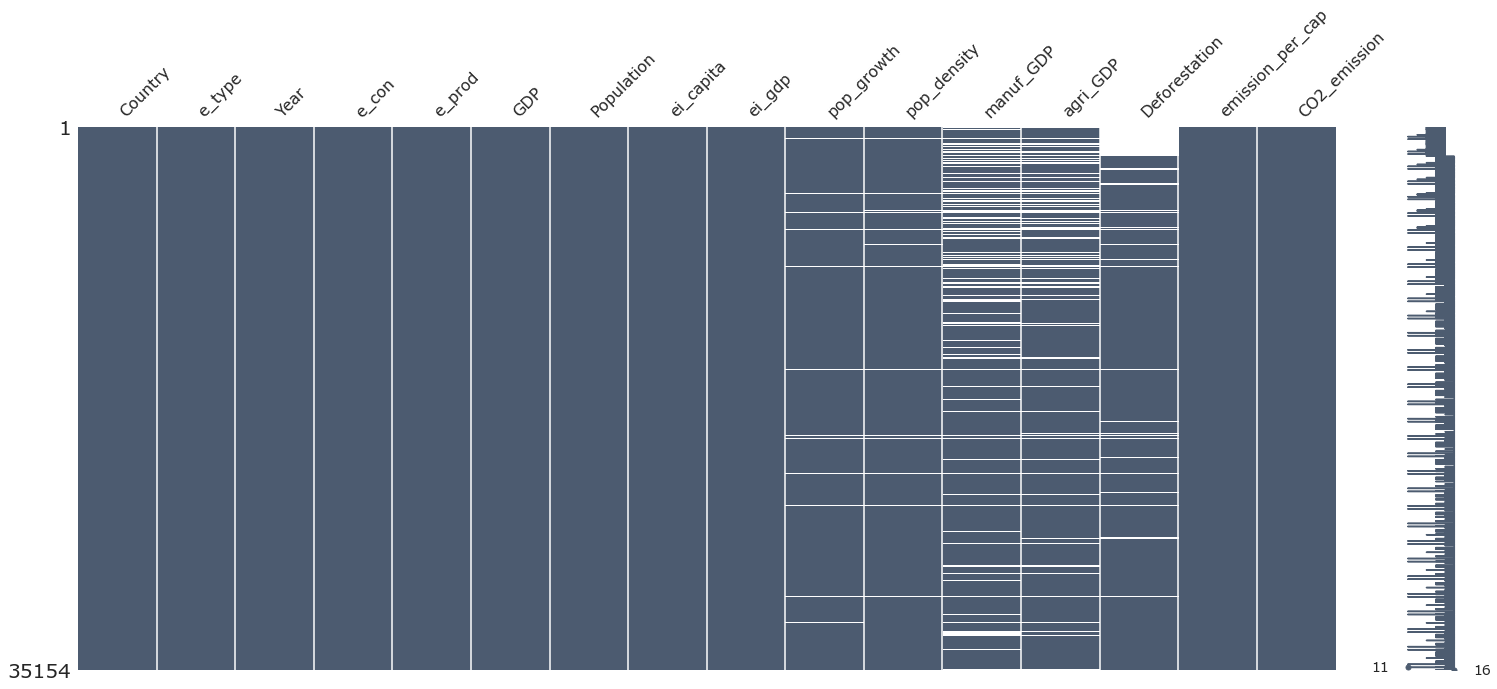

In [5]:
# Let's Visualize our missing values
import missingno as msno

msno.matrix(df, color=(0.3,0.36,0.44))

In [6]:
'''
As Temporary Defeat to our missing values
We Opted to dropping all rows with missing values

AS Base Analysis
'''

df.dropna(subset=['Deforestation', 'agri_GDP', 'manuf_GDP', 'pop_density', 'pop_growth'], inplace=True)

<AxesSubplot:>

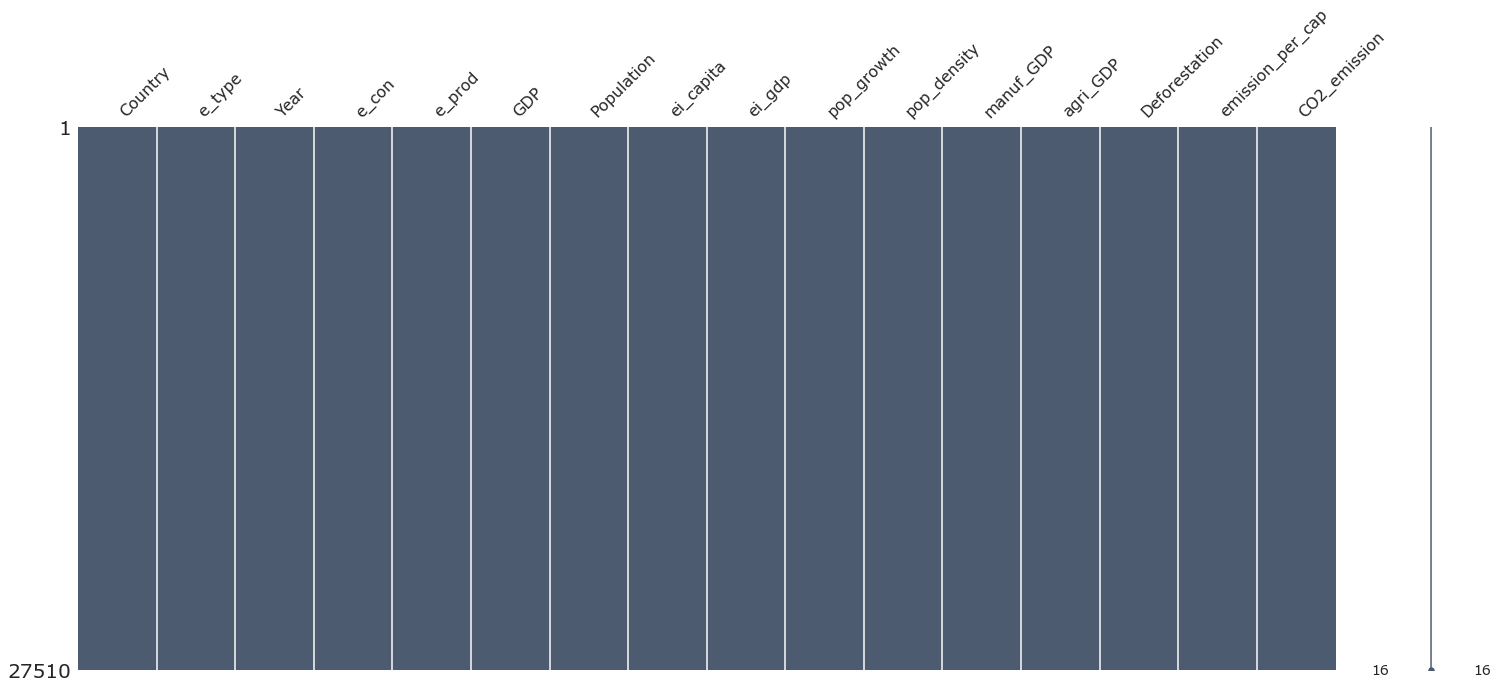

In [7]:
msno.matrix(df, color=(0.3,0.36,0.44))

So We've dropped from `35154` Observations to `27510`, which to a certain extent, representative for our base analysis

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27510 entries, 1920 to 35153
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           27510 non-null  object 
 1   e_type            27510 non-null  object 
 2   Year              27510 non-null  int64  
 3   e_con             27510 non-null  float64
 4   e_prod            27510 non-null  float64
 5   GDP               27510 non-null  float64
 6   Population        27510 non-null  float64
 7   ei_capita         27510 non-null  float64
 8   ei_gdp            27510 non-null  float64
 9   pop_growth        27510 non-null  float64
 10  pop_density       27510 non-null  float64
 11  manuf_GDP         27510 non-null  float64
 12  agri_GDP          27510 non-null  float64
 13  Deforestation     27510 non-null  float64
 14  emission_per_cap  27510 non-null  float64
 15  CO2_emission      27510 non-null  float64
dtypes: float64(13), int64(1), object(2)
m

In [27]:
round(df.describe())

,Year,e_con,e_prod,GDP,Population,ei_capita,ei_gdp,pop_growth,pop_density,manuf_GDP,agri_GDP,Deforestation,emission_per_cap,CO2_emission
count,27510.0,27510.0,27510.0,27510.0,27510.0,27510.0,27510.0,27510.0,27510.0,27510.0,27510.0,27510.0,27510.0,27510.0
mean,2005.0,2.0,2.0,987.0,77392.0,84.0,4.0,2.0,179.0,13.0,13.0,33.0,0.0,108.0
std,8.0,18.0,18.0,7009.0,540498.0,117.0,4.0,1.0,558.0,7.0,12.0,24.0,0.0,1144.0
min,1990.0,-0.0,0.0,0.0,40.0,0.0,0.0,-7.0,1.0,0.0,0.0,0.0,-0.0,-0.0
25%,1998.0,0.0,0.0,14.0,2335.0,10.0,2.0,1.0,28.0,8.0,3.0,12.0,0.0,0.0
50%,2006.0,0.0,0.0,55.0,7779.0,39.0,4.0,1.0,71.0,12.0,9.0,32.0,0.0,0.0
75%,2013.0,0.0,0.0,291.0,23515.0,112.0,5.0,2.0,146.0,17.0,19.0,52.0,0.0,9.0
max,2019.0,601.0,612.0,127690.0,7714631.0,1115.0,167.0,18.0,8045.0,50.0,79.0,99.0,0.0,35585.0


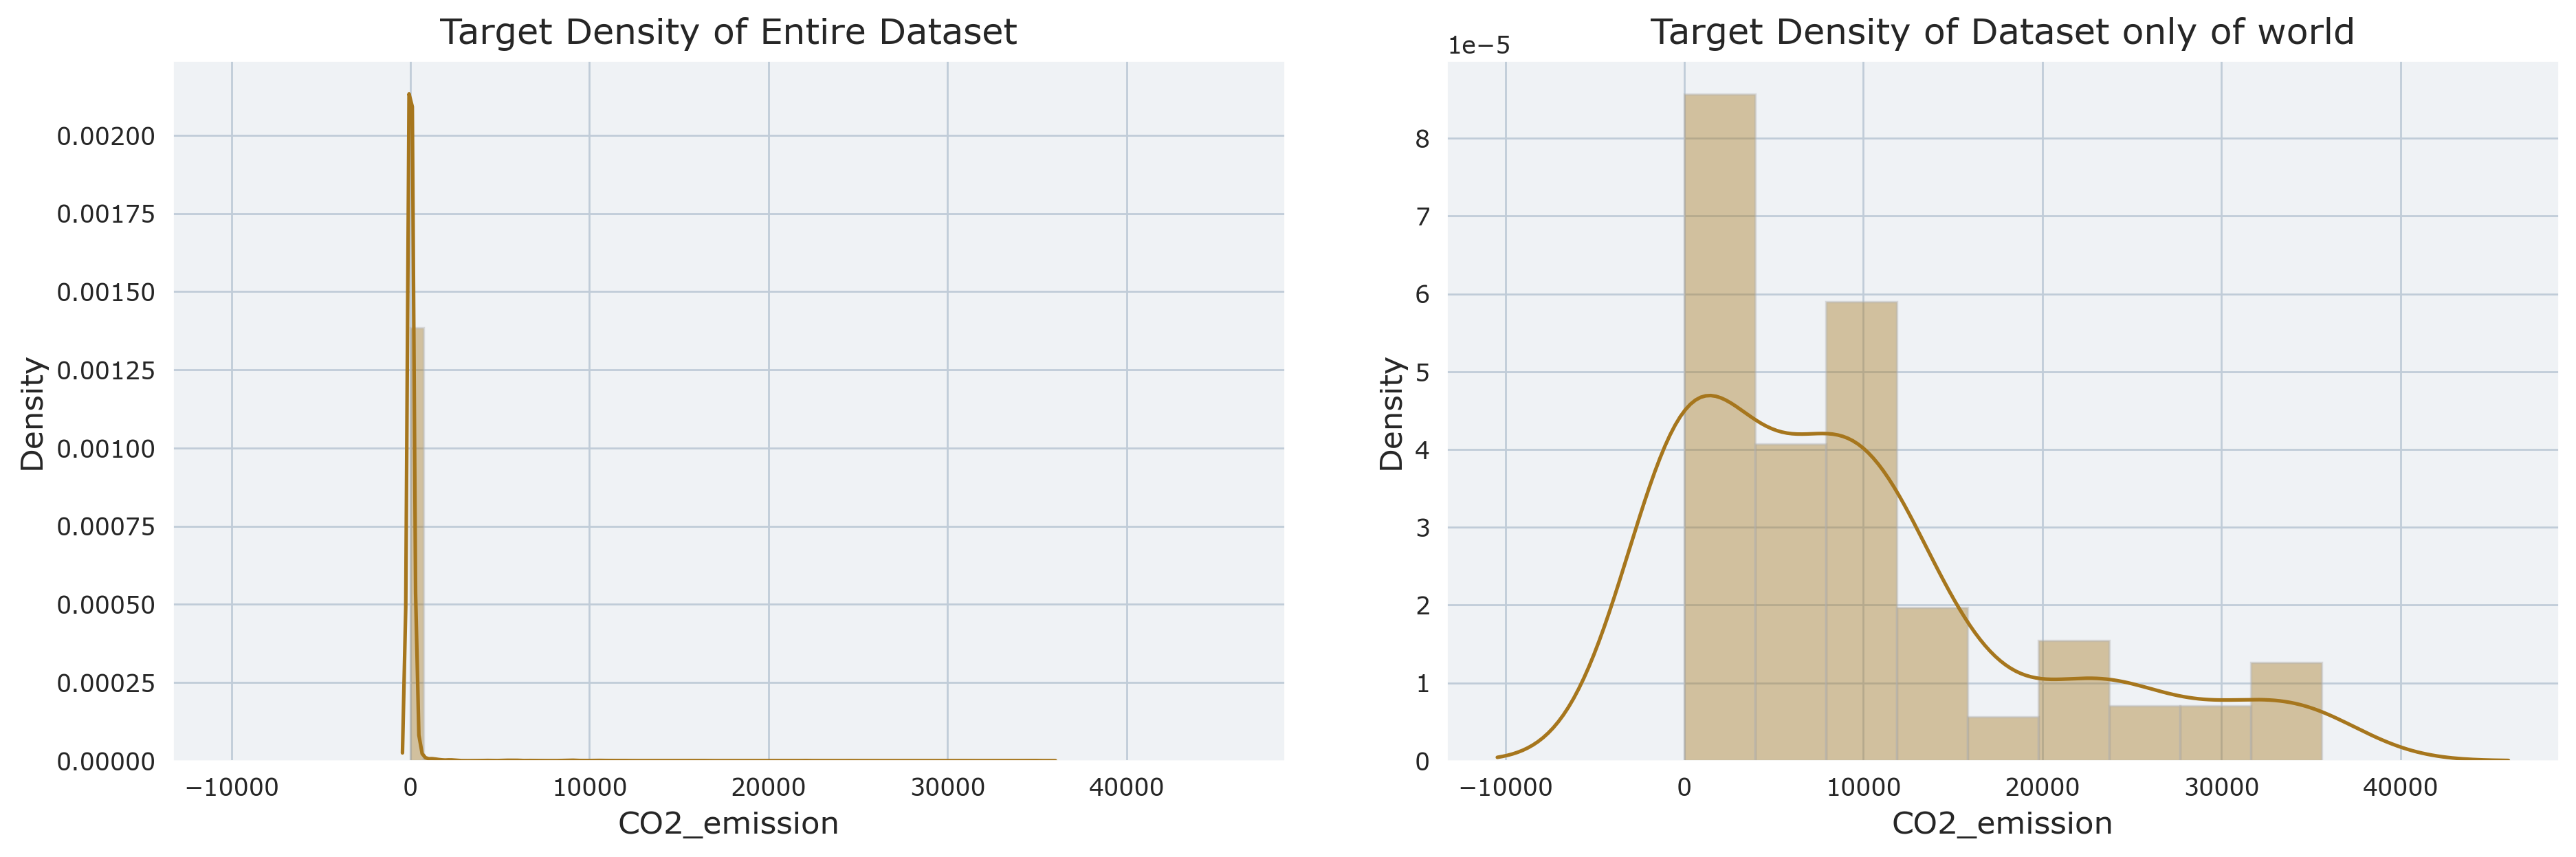

In [14]:
with plt.rc_context(rc = {'figure.dpi': 250, 'axes.labelsize': 13,
                          'xtick.labelsize': 10, 'ytick.labelsize': 10,
                          'legend.title_fontsize': 7, 'axes.titlesize': 15,
                          'axes.titlepad': 7}):


    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    
    # Entire dataset
    sns.distplot(df['CO2_emission'], ax=ax[0]).set_title('Target Density of Entire Dataset')
    
    # Dataset only of world
    world = df[df['Country']=='World']
    sns.distplot(world['CO2_emission'], ax=ax[1]).set_title('Target Density of Dataset only of world')

    plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
    plt.show()

Dataset still representative as the raw energy data we got, and as discovered, our distribution is `highly right skewed`.

**Distribution of energy types**

In [16]:
temp_dist = df.groupby('e_type').count()['CO2_emission'].reset_index().sort_values(by='CO2_emission',ascending=False)
temp_dist.style.background_gradient(cmap='winter')

,e_type,CO2_emission
3,nuclear,4595
5,ren/oth,4595
0,all,4580
1,coal,4580
2,nat_gas,4580
4,pet/oth,4580


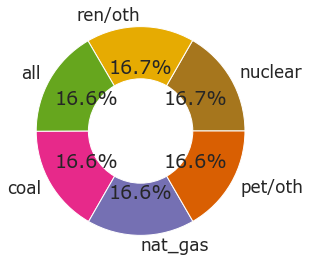

In [18]:
percent = temp_dist['CO2_emission']
labels= temp_dist['e_type']

my_pie,_,_ = plt.pie(percent, radius = 1.2, labels=labels, autopct="%.1f%%")
plt.setp(my_pie, width=0.6, edgecolor='white') 
plt.show()

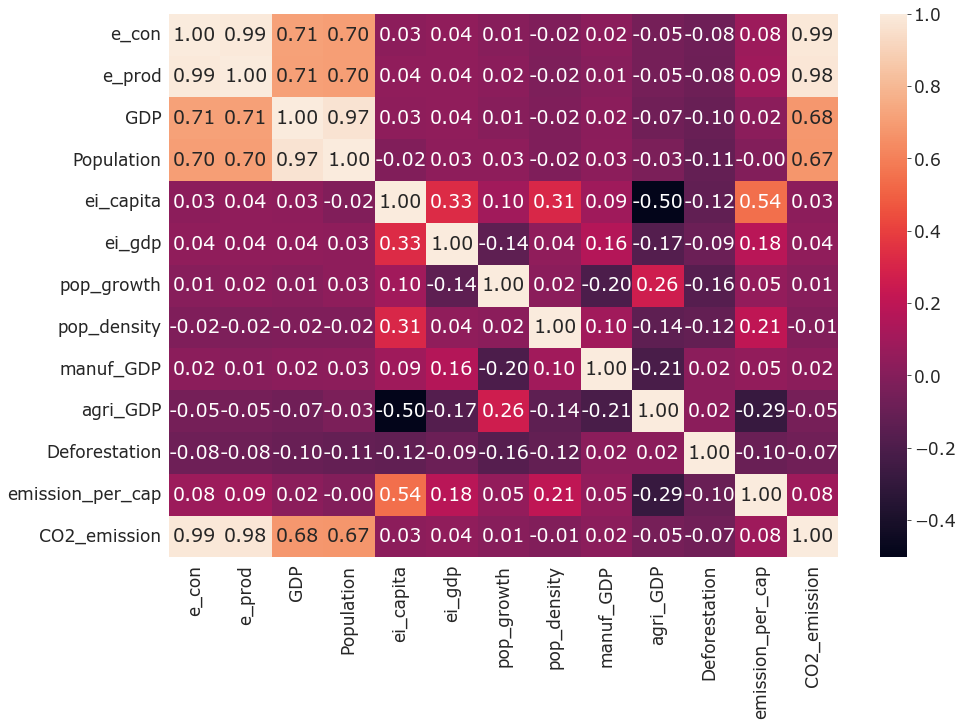

In [20]:
# Visuals of Correlation Heatmap between Features
plt.figure(figsize=(15,10))
sns.heatmap(data=df.iloc[:,3:].corr(), annot=True, fmt='.2f')
plt.show()

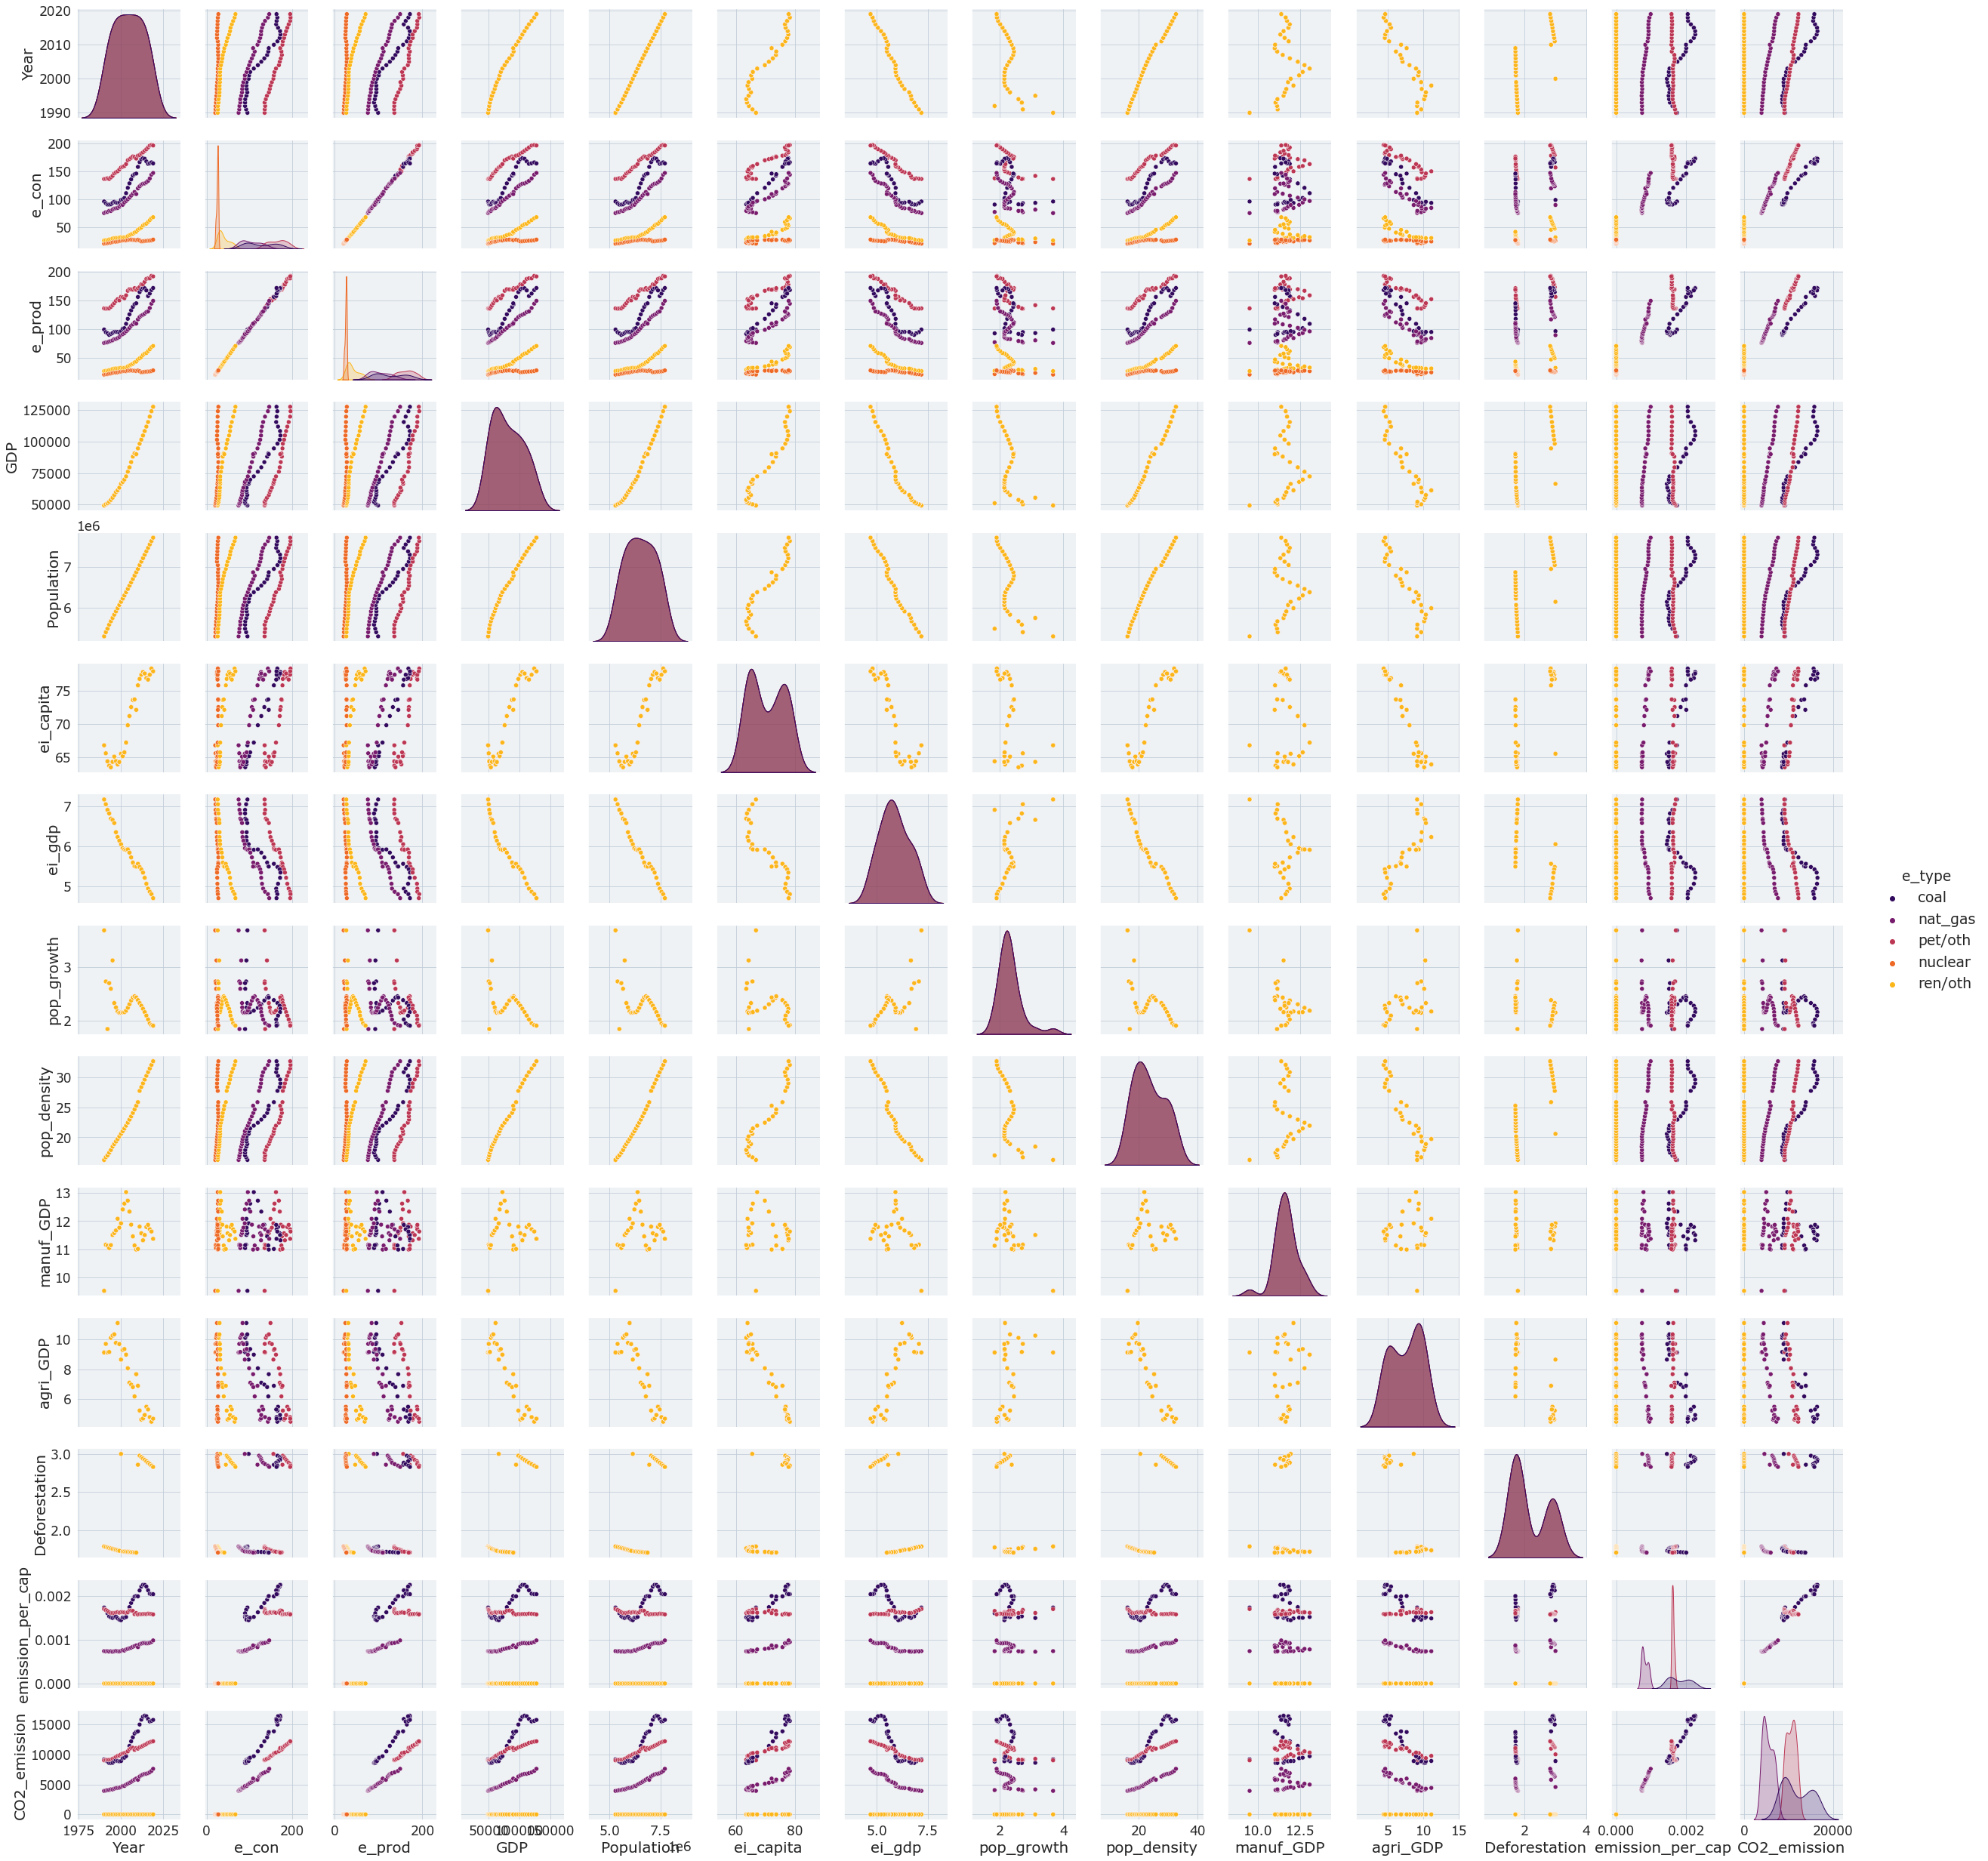

In [21]:
# Let's Get a Pair Plot for the world & for ALL Energy Type Category
temp_pp = df[df['Country']=='World'][df['e_type']!='all']

sns.pairplot(temp_pp, hue='e_type', palette="inferno")
plt.show()

### COMPARING: 
**`Who produced the most CO2 Emissions over this time period?` vs `CO2 Emissions per Capita per Country over this time period`**

In [40]:
# Making temp dataset of all countries and there total CO2 emissions in the time period

# Specifying all countries != world, as well energy_types=all 
cd1 = df[df['Country']!='World'][df['e_type']=='all']

lt = []
for country in cd1['Country'].unique():
    total = cd1[cd1['Country']==country]['CO2_emission'].sum(axis=0)
    lt.extend([[country, total]])
lts = []
for country in cd1['Country'].unique():
    total = cd1[cd1['Country']==country]['emission_per_cap'].sum(axis=0)
    lts.extend([[country, total]])
    
# Temporary dataset of all the Countries and there respective total CO2 Emission over the time period
temp_cd = pd.DataFrame(lt, columns=['Country', 'Total_CO2']).sort_values(by='Total_CO2',ascending=False)
# Temporary dataset of all the Countries and there respective total emission_per_capita over the time period
temp_cd2 = pd.DataFrame(lts, columns=['Country', 'emission_per_cap']).sort_values(by='emission_per_cap',ascending=False)

# Plotting the top 20 Emiters
fig = px.bar(temp_cd.head(20), x='Country', y='Total_CO2', title='Top 20 CO2 Emitters (MMtonnes CO2)')
# Plotting the top 20 emission_per_capita
fig2 = px.bar(temp_cd2.head(20), x='Country', y='emission_per_cap', title='Top 20 Countries with emission_per_capita (MMtonnes CO2 per Pop)')
fig.show(), fig2.show()

(None, None)

From Wiki:

* The UAE economy is heavily reliant on revenues from petroleum and natural gas
* The economy of Singapore is a highly developed free-market economy (an economy in which all resources are owned by individuals), Hence High Transportation, Heat & Electrical energy demand of which it's major sources are Petroleum Fuels 
* Petroleum and natural gas are the cornerstones of Qatar's economy and account for more than 70% of total government revenue, more than 60% of gross domestic product, and roughly 85% of export earnings.
* The economy of Kuwait is a wealthy petroleum-based economy

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9b/OPEC_oil_exports.png" width=100%/> 

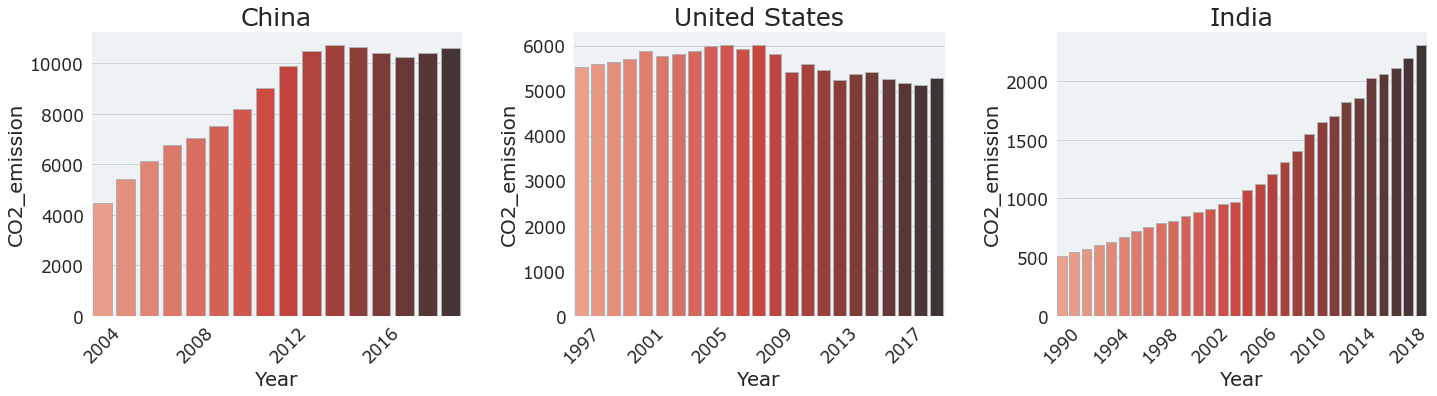

In [42]:
fig, ax = plt.subplots(2, 3, figsize = (20, 10))


# Top 6 Countries
countries = temp_cd['Country'].head(3)
    
# Average CO2 Emission each year for top 6 emiters
for idx, (country, axes) in enumerate(zip(countries, ax.flatten())):
        
    cd3 = df[df['Country']==country][df['e_type']=='all']
    temp_data = cd3.groupby(['Year'])['CO2_emission'].sum().reset_index().sort_values(by='CO2_emission',ascending=False)
    plot_ = sns.barplot(ax=axes, data=temp_data, x='Year', y='CO2_emission', palette="Reds_d")
    
    # Title
    axes.set_title(country)
    
    # Reducing Density of X-ticks
    for ind, label in enumerate(plot_.get_xticklabels()):
        if ind % 4 == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    
    # Rotating X axis
    for tick in axes.get_xticklabels():
        tick.set_rotation(45)
    
    
### Removing empty figures
else:
    [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    

    
plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
plt.show()